<h1>Train & Evaluate & Test Optimal Model Using Label Encoding With Value Recognition Across Columns & Most Correlated features with target</h1>

In [1]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h3>A - Predicting using the tunned parameters of optimal model - RandomForestRegressor()</h3>

In [2]:
label_encoded_challenge_set_df = pd.read_csv('../data/label_encoded_with_value_recognition_challenge_set.csv')

excluded_columns = ['tow', 'aircraft_max_weight', 'flight_id']
correlated_features = []
not_correlated_features = []
for column in label_encoded_challenge_set_df.columns:
    if column not in excluded_columns:
        corr = label_encoded_challenge_set_df[[column, 'tow']].corr().iloc[0, 1]
        if corr > 0.02 or corr < -0.02:
            print(f"correlation between '{column}' and target 'tow' is {corr}")
            correlated_features.append(column)
        else:
            not_correlated_features.append(column)

print("Number of correlated features:", len(correlated_features))
print("Correlated Features: \n", correlated_features)
print("Number of not correlated features:", len(not_correlated_features))
print("Not Correlated Features: \n", not_correlated_features)

correlation between 'adep' and target 'tow' is -0.037042118926749364
correlation between 'country_code_adep' and target 'tow' is -0.04972743859990086
correlation between 'ades' and target 'tow' is -0.03915580533986108
correlation between 'country_code_ades' and target 'tow' is -0.07632118009821381
correlation between 'aircraft_type' and target 'tow' is -0.10615191735732017
correlation between 'wtc' and target 'tow' is 0.9240978782010463
correlation between 'airline' and target 'tow' is -0.15316831197118713
correlation between 'flight_duration' and target 'tow' is 0.8350272248730813
correlation between 'taxiout_time' and target 'tow' is 0.3337631964550785
correlation between 'flown_distance' and target 'tow' is 0.8433684844951457
Number of correlated features: 10
Correlated Features: 
 ['adep', 'country_code_adep', 'ades', 'country_code_ades', 'aircraft_type', 'wtc', 'airline', 'flight_duration', 'taxiout_time', 'flown_distance']
Number of not correlated features: 3
Not Correlated Featu

In [3]:
# Pick up features from dataset
features = label_encoded_challenge_set_df[correlated_features]

# Pick up target from dataset
target = label_encoded_challenge_set_df['tow']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=True)

model = RandomForestRegressor(
    bootstrap=True,
    ccp_alpha=0.001,
    criterion='squared_error',
    max_depth=30,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=8,
    n_estimators=100,
    random_state=123
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

<h3>B - Function to plot an example prediction with the tunned parameters</h3>

In [4]:
def plot_rmse(observed, predicted, show_error=False):
    # Calculate errors
    errors = observed - predicted
    squared_errors = errors**2
    mse = np.mean(squared_errors)
    rmse = np.sqrt(mse)
    
    # Create a plot
    plt.figure(figsize=(10, 6))
    
    # Plot the observed and predicted values
    plt.plot(observed, 'o', label='Observed Values')
    plt.plot(predicted, 'o', label='Predicted Values')
    
    # Plot the errors
    for i in range(len(observed)):
        plt.plot([i, i], [observed[i], predicted[i]], 'r--')
        if show_error:
            plt.text(i, (observed[i] + predicted[i]) / 2, f'{errors[i]:.1f}', ha='right', color='red')
    
    # Adding labels and title
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.title('Visualizing RMSE Calculation')
    plt.legend()
    plt.grid(True)
    
    # Show RMSE in the plot
    plt.text(1.5, max(observed) - 1, f'RMSE = {rmse:.3f}', fontsize=12, color='blue')

    plt.xticks([])
    plt.show()

<h3>C - Plotting random 100 points without showing individual datapoints errors</h3>

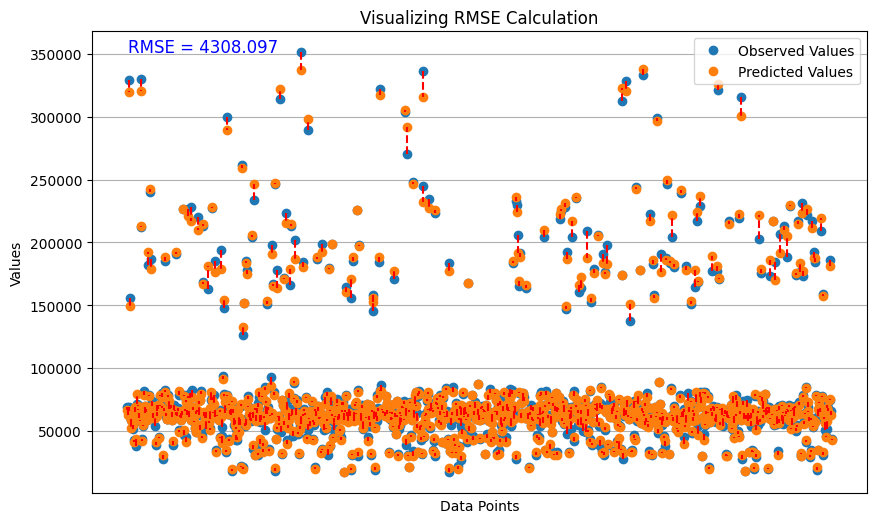

In [5]:
random_indices = np.random.choice(X_test.index, size=1000, replace=False)
X_test_sampled = X_test.loc[random_indices]
y_test_sampled = y_test.loc[random_indices]

y_pred_sampled = model.predict(X_test_sampled)

plot_rmse(observed=np.array(y_test_sampled), predicted=np.array(y_pred_sampled), show_error=False)

<h3>D - Plotting random 10 points and showing individual datapoints errors</h3>

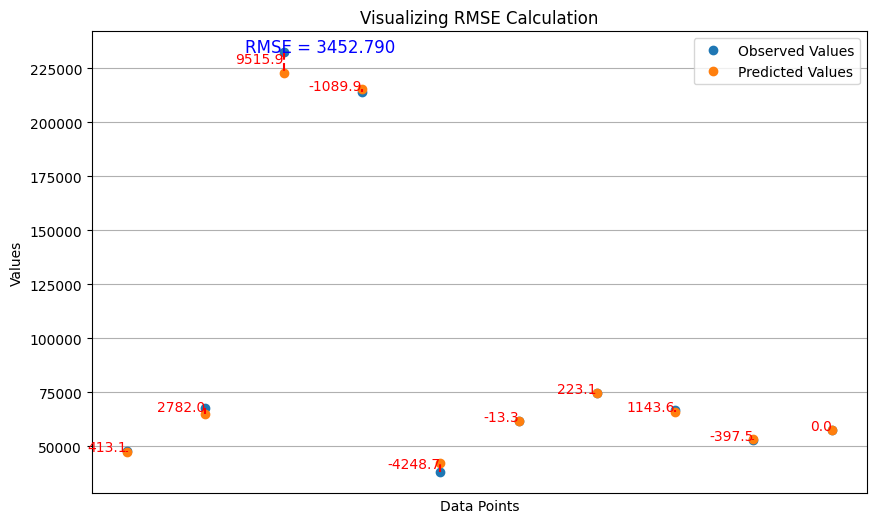

In [6]:
random_indices = np.random.choice(X_test.index, size=10, replace=False)

X_test_sampled = X_test.loc[random_indices]
y_test_sampled = y_test.loc[random_indices]

y_pred_sampled = model.predict(X_test_sampled)

plot_rmse(observed=np.array(y_test_sampled), predicted=np.array(y_pred_sampled), show_error=True)

In [7]:
def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

y_pred = model.predict(X_test)

print(f"RMSE: {rmse(y_test, y_pred)}")

RMSE: 4249.00791735282
